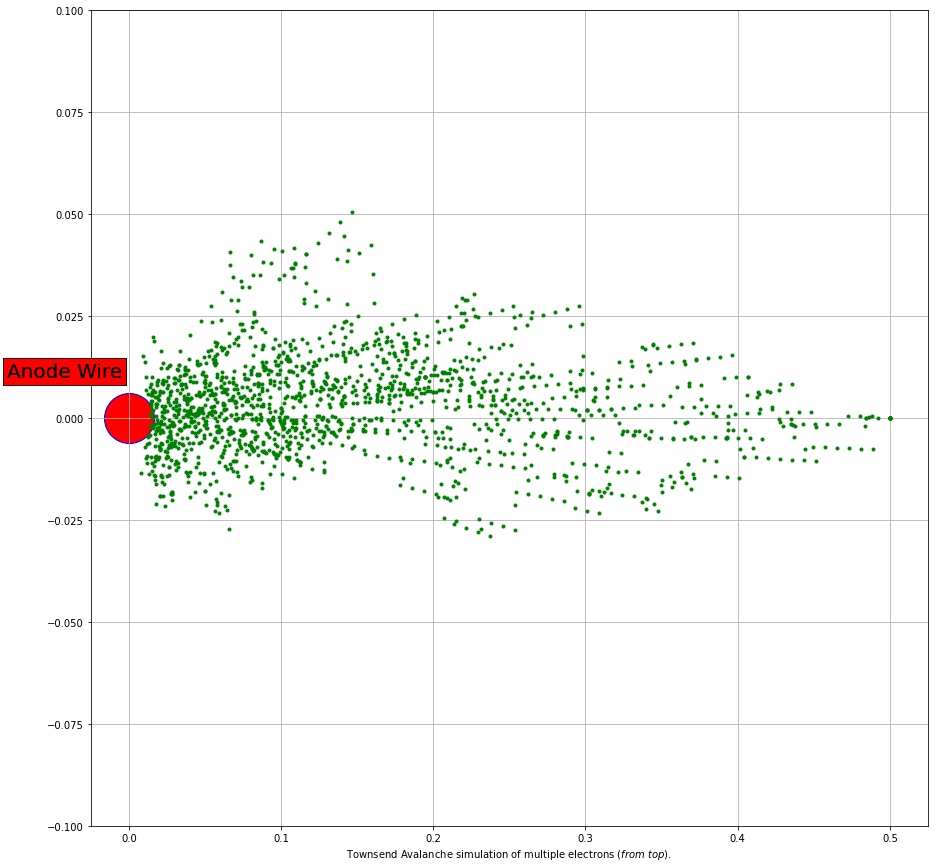

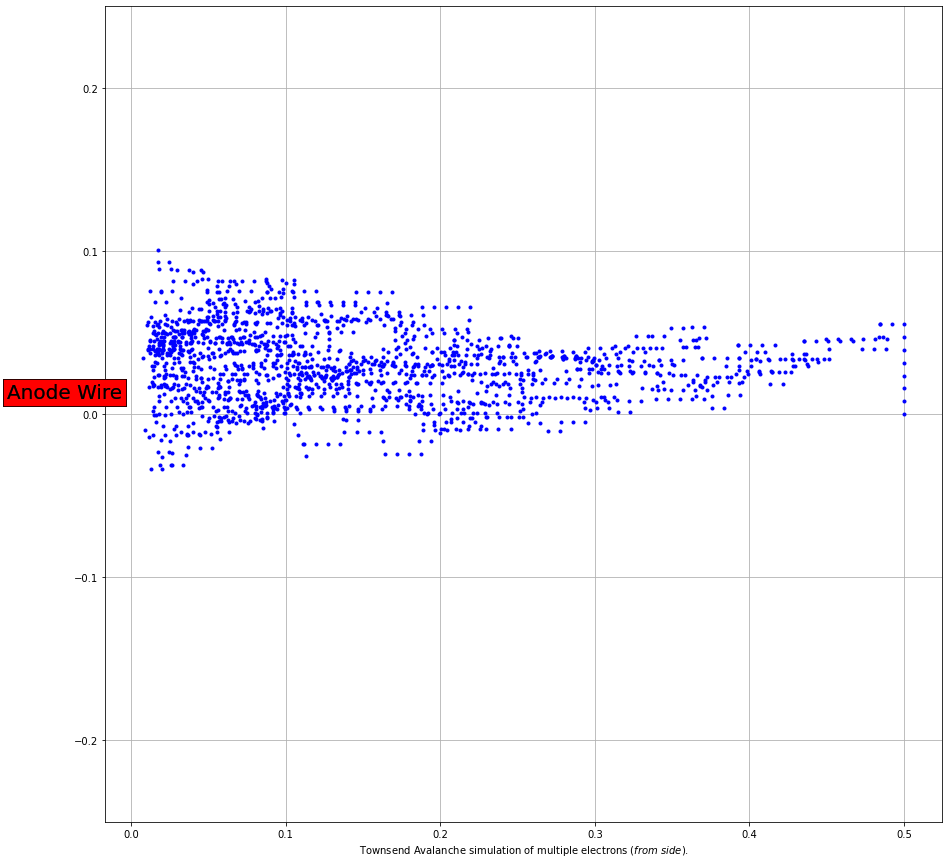

In [27]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from mc import *
import random
from matplotlib import patches

r = 0.5                 # mm
theta = 0               # Degrees
z = 0                   # mm
# Velocity vector direction and energy
psi = 0                # Degrees
cap_psi = 180           # Degrees
energy = 10             # eV

# Ionization energy
energy_ion = 15.76      # eV

# Excitation energy
energy_exc = 11.6        # eV
def position_next(r, theta, z, psi, cap_psi):
    r = r_next(r, psi, cap_psi)
    theta =  theta_next(theta, r, psi, cap_psi)
    z = z_next(z, psi)
    return [r, theta, z]

def velocity_position(energy,  psi, cap_psi):
    v_r_val = v_r(energy, psi, cap_psi)
    v_theta_val = v_theta(energy, psi, cap_psi)
    v_z_val = v_z(energy, psi)
    return [v_r_val,  v_theta_val,  v_z_val]

def velocity_next(energy,  psi, cap_psi):
    v_z_next_val = v_z_next(energy, psi)
    v_theta_next_val = v_theta_next(r, energy, psi, cap_psi)
    v_r_next_val = v_r_next(r, energy, psi, cap_psi)
    return [v_r_next_val,  v_theta_next_val,  v_z_next_val] 

def psi_cap_psi_next():
    return psi_next(r, energy, psi, cap_psi), cap_psi_next(r, energy, psi, cap_psi)


Position_list_final = [[r,theta,z]]
Position_list_overall = []
def MC_driver(r, theta, z, psi, cap_psi, energy):
    Velocity_list, Position_list = [], []
    rand_val, collision_position = 0, []
    while (r > R_a and r < R_c):
        position_val = position_next(r,theta,z, psi,cap_psi)
        Position_list.append(position_val)
        velocity_val = [velocity_position(energy,  psi, cap_psi)]
        Velocity_list.append(velocity_val)
        rand_val = random.random()
        if rand_val < 0.5:          # No collision
            velocity_next_val = velocity_next(energy,  psi, cap_psi)
            psi, cap_psi = psi_cap_psi_next()
        else:                                   # Collision
            if energy > energy_ion:
                psi, cap_psi = random.uniform(0,180), random.uniform(0,360)
                collision_position.append([position_val[0], position_val[1], position_val[2], psi, cap_psi, energy])
                energy = energy - energy_ion
            elif energy > energy_exc:
                psi, cap_psi = random.uniform(0,180), random.uniform(0,360)
                energy = energy - energy_exc
        energy = energy_next(r, energy, psi, cap_psi)
        r, theta, z = position_val[0], position_val[1], position_val[2]
    return Position_list, collision_position

Position, collision = MC_driver(r, theta, z, psi, cap_psi, energy)
Position_list_final.extend(Position)
Position_list_overall.append(Position_list_final)
for collision_val in collision:
    Position_list_final = [[collision_val[0], collision_val[1], collision_val[2]]]
    Position, collision = MC_driver(collision_val[0], collision_val[1], collision_val[2], collision_val[3], random.uniform(0,180), random.uniform(0,360))
    Position_list_final.extend(Position)
    Position_list_overall.append(Position_list_final)

#print(len(Position_list_overall))

plt.figure(figsize=(15,15))



for Position_list_final in Position_list_overall:
    x_list = [position_ele[0]*m.cos(position_ele[1]*m.pi/180) for position_ele in Position_list_final]
    y_list = [position_ele[0]*m.sin(position_ele[1]*m.pi/180) for position_ele in Position_list_final]
    x_list.pop(-1), y_list.pop(-1)
    plt.plot(x_list, y_list, '.g')
    plt.grid()
#plt.legend()
    plt.xlabel("Townsend Avalanche simulation of multiple electrons ($from~ top$).")
    plt.text(-0.08, 0.01, 'Anode Wire', fontsize=20, bbox=dict(facecolor='red', alpha=0.5))
    #plt.ylim(-0.5,0.5)

plt.scatter(0, 0, s=2500, facecolors='red', edgecolors='blue')
plt.ylim(-0.1,0.1)
plt.show()

plt.figure(figsize=(15,15))
for Position_list_final in Position_list_overall:
    x_list = [position_ele[0]*m.cos(position_ele[1]*m.pi/180) for position_ele in Position_list_final]
    z_list = [position_ele[2] for position_ele in Position_list_final]
    x_list.pop(-1), z_list.pop(-1)
    plt.plot(x_list, z_list, '.b')
    plt.grid()
#plt.legend()
    plt.xlabel("Townsend Avalanche simulation of multiple electrons ($from~side$).")
    plt.text(-0.08, 0.01, 'Anode Wire', fontsize=20, bbox=dict(facecolor='red', alpha=0.5))
    #plt.ylim(-0.5,0.5)

plt.ylim(-0.25,0.25)
plt.show()